In [34]:
import rasterio                  # I/O raster data (netcdf, height, geotiff, ...)
import os
import matplotlib.pyplot as plt  # plotting tools
%matplotlib inline
import pickle
import numpy as np
import geopandas as gps
import pandas as pd
import math

In [4]:
dataset_dir=r'J:\5_lakemapping\patchesReshape'
# output_dir=r'D:\lakemapping\2_dataset\output588'
image_fn = 'image'
image_type = '.tif' 
patch_size = (512,512,4)
type_num=6

### 1

In [3]:
dataType='val'
i=0

[]

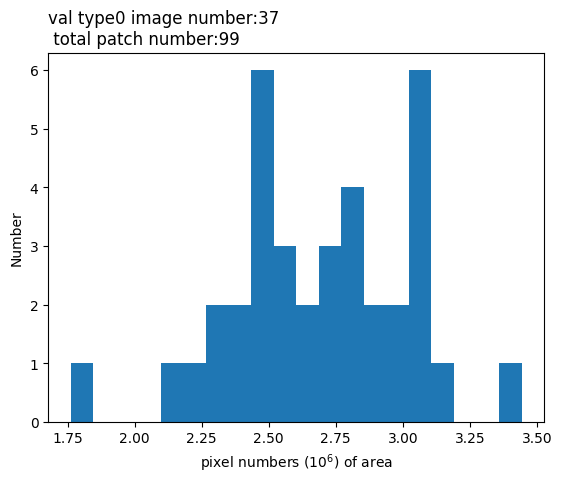

In [14]:
numList=[]
path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
all_files = os.listdir(path_to_write)
all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
for j, fn in enumerate(all_files_image):
    img = rasterio.open(os.path.join(path_to_write, fn))
    read_img = img.read()
    rowNum=read_img.shape[1]/100#patch_size[0]
    colNum=read_img.shape[2]/100#patch_size[1]
    numList.append(rowNum*colNum)
# numList.sort()
x=range(0,len(numList))
plt.hist(numList,bins=20)
plt.xlabel('pixel numbers ($10^6$) of area')
plt.ylabel('Number')
numList=np.array(numList)
plt.title(dataType+' type{} image number:{}\n total patch number:{}'.format(i,len(all_files_image),int(numList.sum())),loc='left')
# plt.ylim(0,80)
# plt.xlim(0,45)
plt.plot()
# fig_name = dataType+'_type{}.png'.format(i)
# plt.savefig(fig_name)
# plt.close()
# i=i+1

### 2

In [81]:
dataType='val'
totalNumList=[]
for i in range(0,type_num):
    numList=[]
    path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
    all_files = os.listdir(path_to_write)
    all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
    for j, fn in enumerate(all_files_image):
        img = rasterio.open(os.path.join(path_to_write, fn))
        read_img = img.read()
        rowNum=read_img.shape[1]/100#/patch_size[0]
        colNum=read_img.shape[2]/100#/patch_size[1]
        numList.append(rowNum*colNum)
    numList.sort()
    totalNumList=totalNumList+numList
    # print('{},{}'.format(len(all_files_image),int(np.array(numList).sum())))
x=range(0,len(totalNumList))
plt.bar(x,totalNumList)
plt.xlabel('area num')
plt.ylabel('patch num per area')
# plt.title(dataType)
# fig_name = dataType+'_area_patch_num_bar.png'.format(i)
# plt.savefig(fig_name)
plt.close()

KeyboardInterrupt: 

### 3

Text(0, 0.5, 'Number')

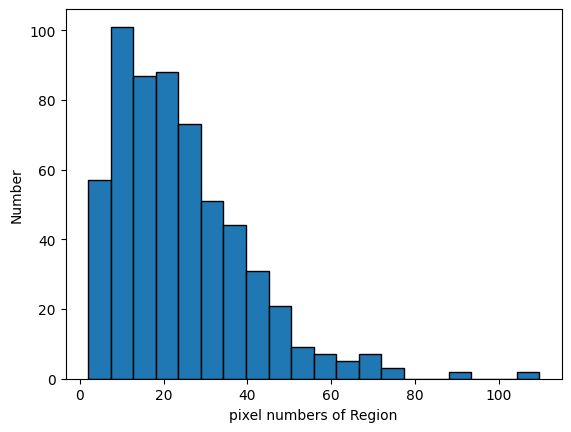

In [20]:
# numList=[]
# for i in range(0,type_num):
#     path_to_write=os.path.join(output_dir,'output{}'.format(i))
#     all_files = os.listdir(path_to_write)
#     all_files_NDWI = [fn for fn in all_files if fn.startswith(NDWI_fn) and fn.endswith(image_type)]#ndwi.png
#     for j, fn in enumerate(all_files_NDWI):
#         NDWI_img = rasterio.open(os.path.join(path_to_write, fn))
#         read_NDWI_img = NDWI_img.read()
#         rowNum=read_NDWI_img.shape[1]/patch_size[0]
#         colNum=read_NDWI_img.shape[2]/patch_size[1]
#         numList.append(rowNum*colNum)
plt.hist(numList,bins=20,histtype='bar',edgecolor="k")
# plt.xscale("log")
plt.xlabel("pixel numbers of Region")
plt.ylabel("Number")

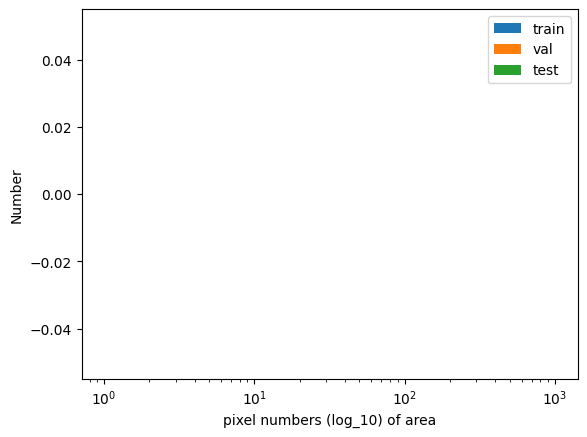

In [82]:
def fun(dataType):
    numList=[]
    for i in range(0,type_num):
        path_to_write=os.path.join(dataset_dir,'{}/type{}'.format(dataType,i))
        all_files = os.listdir(path_to_write)
        all_files_image = [fn for fn in all_files if fn.startswith(image_fn) and fn.endswith(image_type)]#ndwi.png
        for j, fn in enumerate(all_files_image):
            img = rasterio.open(os.path.join(path_to_write, fn))
            read_img = img.read()
            rowNum=read_img.shape[1] #/100 #patch_size[0]
            colNum=read_img.shape[2] #/100 #patch_size[1]
            # numList.append(math.log10(rowNum*colNum))
            numList.append(rowNum*colNum)
    return numList
trainNum=fun("train")
valNum=fun("val")
testNum=fun("test")
plt.hist([trainNum,valNum,testNum],bins=[1,10,100,1000],stacked=True)
plt.xscale("log")
plt.xlabel("pixel numbers (log_10) of area")
plt.ylabel("Number")
plt.legend(['train','val','test'])

In [25]:
# 读取现有history文件
with open(r'D:\lakemapping\3_training\U_Net\notebooks\history\6type_512\history_20231202-2055_AdaDelta_dice_loss_012345_512.txt','rb')as file_pi:
    h_adadelta=pickle.load(file_pi)
# with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\no_change\history_AdaDelta_dice_loss_512100_16_0123.txt','rb')as file_pi:
#     h_comparision=pickle.load(file_pi)
# with open(r'D:\lakemapping\U_Net\notebooks\history\6type_588\step_per_epoch=532\new_random_strategy\history_adam_dice_loss_512100_16_0123.txt','rb')as file_pi:
#     h_adam=pickle.load(file_pi)

Text(0, 0.5, 'Loss')

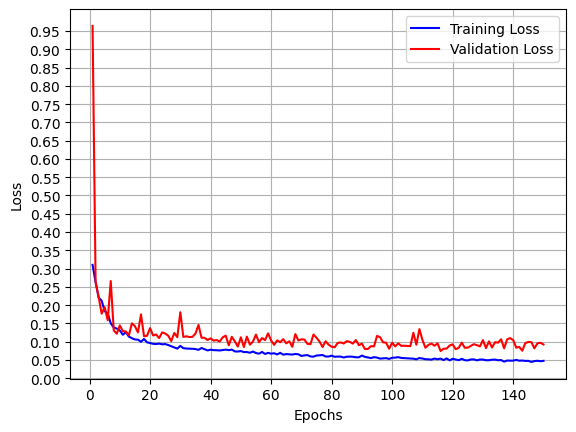

In [32]:
plt.figure()
train_loss =h_adadelta['loss']
val_loss =h_adadelta['val_loss']
# train_loss_adam =h_adam['loss']
# val_loss_adam =h_adam['val_loss']
# x_ticks= np.arange(1, 101,10) 
y_ticks = np.arange(0,1,0.05)
# y_ticks_loss = np.arange(0,0.25,0.05)
epochs = np.arange(1, len(train_loss)+1,1)
# epochs_adam = np.arange(1, len(train_loss_adam)+1,1)
plt.plot(epochs,train_loss, 'b', label='Training Loss')
plt.plot(epochs,val_loss, 'r', label='Validation Loss')
# plt.plot(epochs_adam,train_loss_adam, 'b--', label='Training Loss')
# plt.plot(epochs_adam,val_loss_adam, 'r--', label='Validation Loss')
# plt.grid(color='gray', linestyle='--')
plt.legend()
plt.grid()
# plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Epochs')
plt.ylabel('Loss')

4

In [35]:
polygon = gps.read_file(r'D:\lakemapping\6_draw_figure\polygons_data.shp')
polygon

,CLASS_NAME,area_type,area,geometry
0,Lake,1,0.018956,"POLYGON Z ((-66.54333 -2.42330 0.00000, -66.54..."
1,LakeLikeRiver,1,0.040392,"POLYGON Z ((-66.49653 -2.42321 0.00000, -66.49..."
2,LakeLikeRiver,1,0.230842,"POLYGON Z ((-66.49959 -2.42312 0.00000, -66.49..."
3,Lake,1,0.030468,"POLYGON Z ((-66.43051 -2.42132 0.00000, -66.43..."
4,Lake,1,0.005558,"POLYGON Z ((-66.55762 -2.43021 0.00000, -66.55..."
...,...,...,...,...
216021,Reservoir,1,0.054103,"POLYGON Z ((121.64222 18.01014 0.00000, 121.64..."
216022,Reservoir,2,0.000091,"POLYGON Z ((33.00752 24.34722 0.00000, 33.0076..."
216023,Reservoir,2,0.189746,"POLYGON Z ((33.00752 24.34722 0.00000, 33.0074..."
216024,Reservoir,2,0.000091,"POLYGON Z ((33.02126 24.33500 0.00000, 33.0212..."


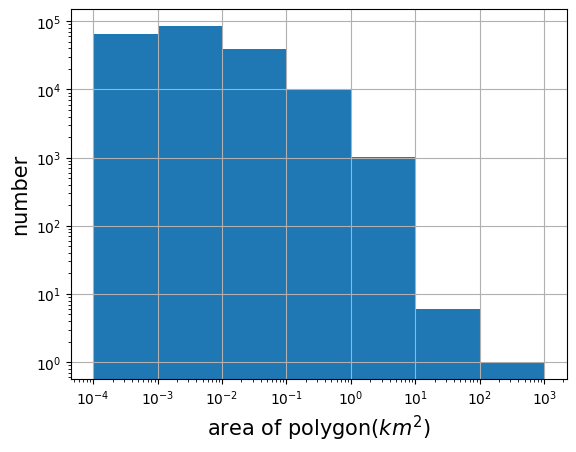

In [79]:
# area=polygon[(polygon['area']<122)&(polygon['area']>0.001)]['area']
# area.plot(x='area',kind='hist',logy=True,xticks=[0,4,6,8,12,16])
plt.hist(polygon['area'],bins=[0.0001,0.001,0.01,0.1,1,10,100,1000])
plt.xlabel('area of polygon($km^2$)',fontsize=15)
plt.ylabel('number',fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.grid()

In [62]:
area = gps.read_file(r'D:\lakemapping\6_draw_figure\area_data.shp')
area

,id,type,file_name,area,geometry
0,147,0,147,273.169244,"POLYGON Z ((-68.41069 8.59871 0.00000, -68.410..."
1,168,0,168,270.570486,"POLYGON Z ((-66.74551 9.46029 0.00000, -66.745..."
2,178,0,178,195.743075,"POLYGON Z ((-65.28751 9.40588 0.00000, -65.118..."
3,343,0,343,448.565618,"POLYGON Z ((-6.44306 10.00929 0.00000, -6.2776..."
4,863,0,863,883.386696,"POLYGON Z ((80.11555 8.41787 0.00000, 80.39947..."
...,...,...,...,...,...
742,17683,5,17683,521.261347,"POLYGON Z ((116.21661 -29.38319 0.00000, 116.4..."
743,17753,5,17753,753.615692,"POLYGON Z ((123.22449 -29.09343 0.00000, 123.4..."
744,17883,5,17883,31.153862,"POLYGON Z ((136.76231 -27.69697 0.00000, 136.8..."
745,18710,5,18710,376.203141,"POLYGON Z ((-68.65232 -40.45139 0.00000, -68.6..."


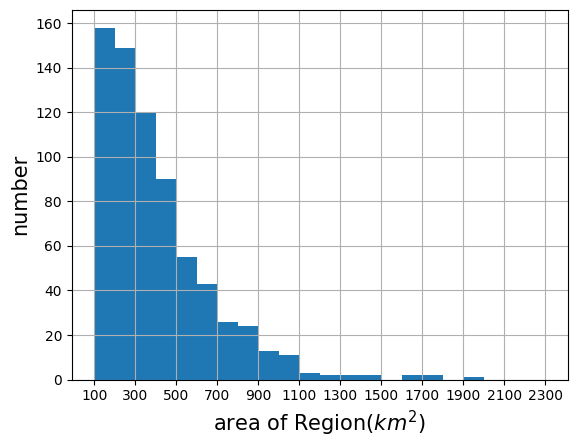

In [78]:
bin=np.arange(100,2400,100)
xtick=np.arange(100,2400,200)
plt.hist(area['area'],bins=bin)
plt.xlabel('area of Region($km^2$)',fontsize=15)
plt.ylabel('number',fontsize=15)
plt.xticks(xtick)
# plt.xscale('log')
# plt.yscale('log')
plt.grid()